# `ExtraTrees` Classifier

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

sns.set(rc={'figure.figsize':(7.5,5)})

### Load Iris Dataset

In [2]:
data = datasets.load_iris()

iris = pd.DataFrame(data['data'], columns=data['feature_names'])
iris['target'] = data['target']
iris = iris.assign(species=lambda x: x['target'].map(dict(enumerate(data['target_names']))))

# Shuffle dataset and print first 5 rows
iris.sample(frac=1, random_state=32).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
55,5.7,2.8,4.5,1.3,1,versicolor
22,4.6,3.6,1.0,0.2,0,setosa
26,5.0,3.4,1.6,0.4,0,setosa
56,6.3,3.3,4.7,1.6,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris[['sepal length (cm)', 'sepal width (cm)']].to_numpy(),
    iris[['target']].to_numpy(),
    test_size=0.1, random_state=32
)

Write a function to plot the decision boundary train/test points

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_surface(X_train, X_test, y_train, y_test, max_depth=None, n_estimators=100):
    x_train_min, x_train_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
    y_train_min, y_train_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
    x_test_min, x_test_max = X_test[:, 0].min() - 0.1, X_test[:, 0].max() + 0.1
    y_test_min, y_test_max = X_test[:, 1].min() - 0.1, X_test[:, 1].max() + 0.1
    
    x_min = min(x_train_min, x_test_min)
    x_max = max(x_train_max, x_test_max)
    y_min = min(y_train_min, y_test_min)
    y_max = max(y_train_max, y_test_max)
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict
    model = ExtraTreesClassifier(
        max_depth=max_depth, 
        n_estimators=n_estimators,
        random_state=32,
        n_jobs=-1
    )
    model.fit(X_train, y_train.ravel())
    z = model.predict(X_grid)
    z = z.reshape(xx.shape)

    # Plot
    plt.figure()
    plt.contourf(xx, yy, z, cmap=ListedColormap(["blue", "red", "green"]), alpha=.2)
    plt.scatter(X_train[:, 0], X_train[:, 1], cmap=ListedColormap(["blue", "red", "green"]), s=20, c=y_train)
    plt.scatter(X_test[:, 0], X_test[:, 1], cmap=ListedColormap(["blue", "red", "green"]), s=20, c=y_test, marker='x')
    
    plt.title(f"Max Depth: {max_depth}, Number of Estimators (Trees): {n_estimators}")
    plt.show()
    
    # Print stats
    print(f"^^^ Train accuracy: {round(model.score(X_train, y_train), 2)}, Test accuracy: {round(model.score(X_test, y_test), 2)} ^^^")
    

## ExtraTrees

This is an **ensemble** method. Meaning we stack a bunch of trees together. `ExtraTrees `fits a number of randomized decision trees (extra trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Rather than try all splits on all variables, we add a new parameter `K` which is the number of splits to try for each tree. We do a bunch of these and average them together.

Smooth prediction surfaces coming from averaging many extra trees, total variance is reduced over the choppy decision trees.

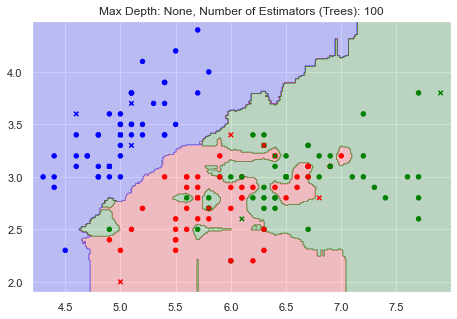

^^^ Train accuracy: 0.94, Test accuracy: 0.6 ^^^


In [5]:
plot_surface(X_train, X_test, y_train, y_test)

### Hyperparameters

#### Max Depth

This sets the max depth of each tree we're building. The tree grows until we reach the max depth limit. The lower the number, the less decision boundaries you will have.

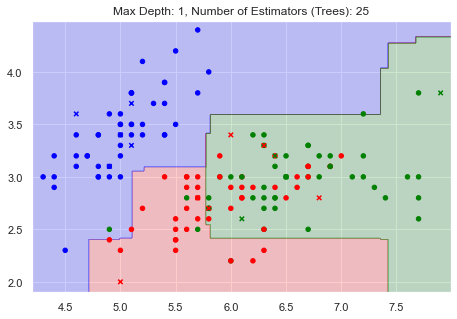

^^^ Train accuracy: 0.79, Test accuracy: 0.73 ^^^


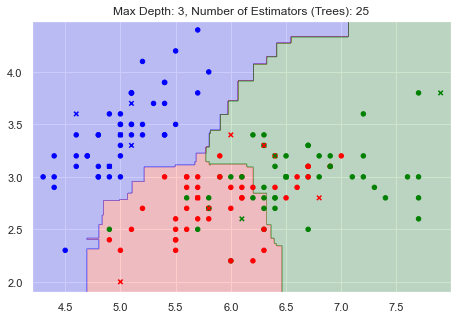

^^^ Train accuracy: 0.81, Test accuracy: 0.73 ^^^


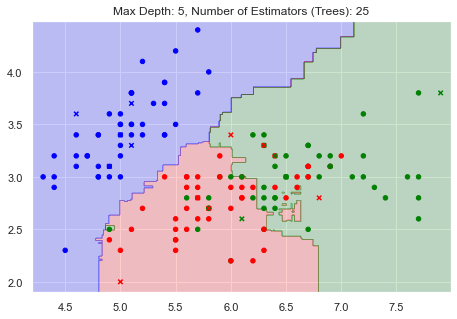

^^^ Train accuracy: 0.85, Test accuracy: 0.73 ^^^


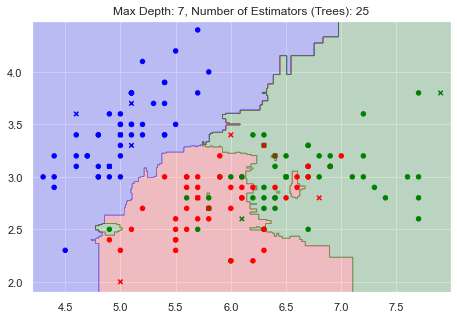

^^^ Train accuracy: 0.89, Test accuracy: 0.67 ^^^


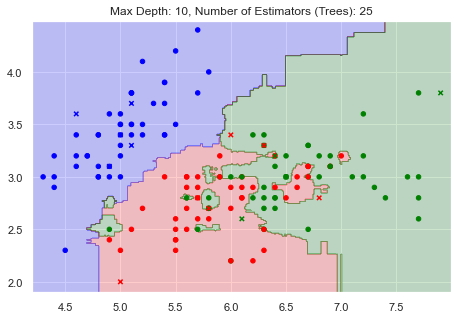

^^^ Train accuracy: 0.94, Test accuracy: 0.6 ^^^


In [6]:
for depth in [1, 3, 5, 7, 10]:
    plot_surface(X_train, X_test, y_train, y_test, max_depth=depth, n_estimators=25)

#### N_estimators

How many trees should we build and average?

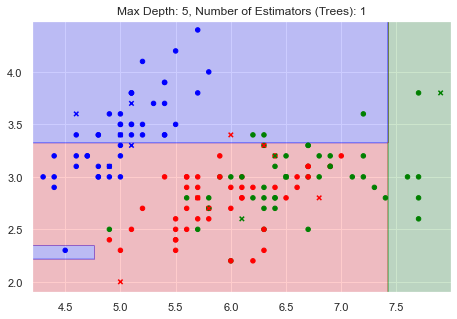

^^^ Train accuracy: 0.58, Test accuracy: 0.6 ^^^


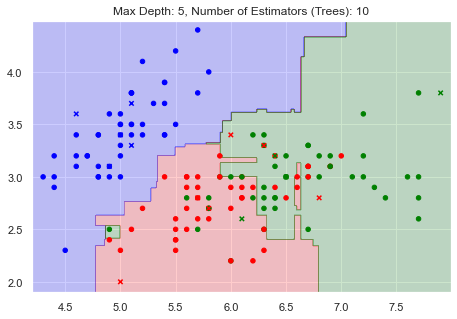

^^^ Train accuracy: 0.85, Test accuracy: 0.73 ^^^


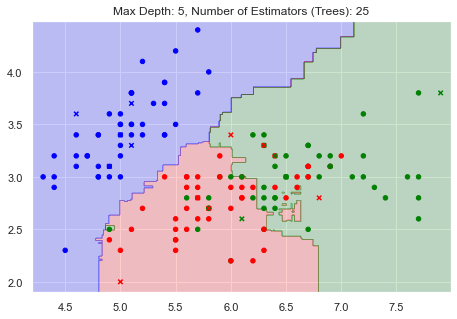

^^^ Train accuracy: 0.85, Test accuracy: 0.73 ^^^


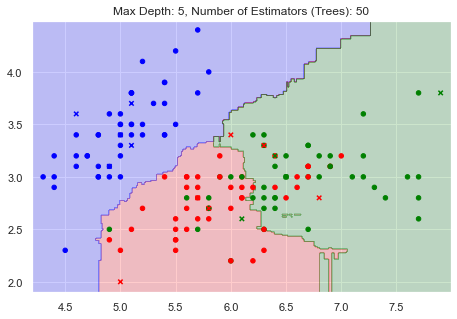

^^^ Train accuracy: 0.84, Test accuracy: 0.73 ^^^


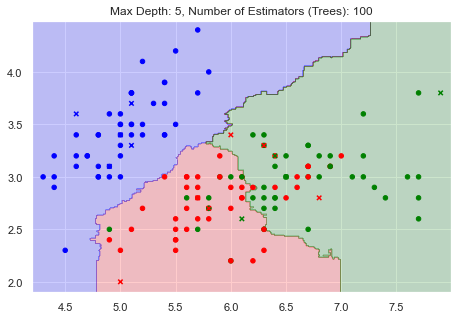

^^^ Train accuracy: 0.84, Test accuracy: 0.73 ^^^


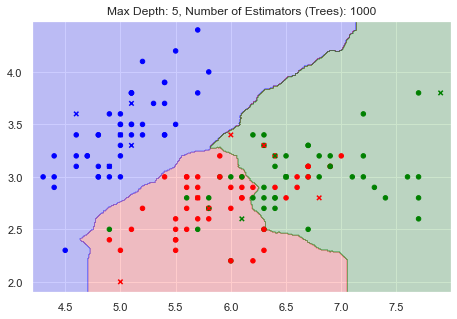

^^^ Train accuracy: 0.84, Test accuracy: 0.73 ^^^


In [7]:
for estimators in [1, 10, 25, 50, 100, 1000]:
    plot_surface(X_train, X_test, y_train, y_test, max_depth=5, n_estimators=estimators)

### Cross Validation: What's the best tree?

In [15]:
from sklearn.model_selection import GridSearchCV

model = ExtraTreesClassifier(n_jobs=-1)

cv_params = {
    'max_depth': [1, 2, 3, 4, 5, 7, 10],
    'max_leaf_nodes': [2, 3, 6],
    'n_estimators': [1, 10, 25, 40, 50, 60, 70, 80, 100]
}

In [16]:
grid_search = GridSearchCV(model, param_grid=cv_params)

grid_search.fit(X_train, y_train.ravel())

GridSearchCV(estimator=ExtraTreesClassifier(n_jobs=-1),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 7, 10],
                         'max_leaf_nodes': [2, 3, 6],
                         'n_estimators': [1, 10, 25, 40, 50, 60, 70, 80, 100,
                                          1000]})

In [17]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 3, 'n_estimators': 25}


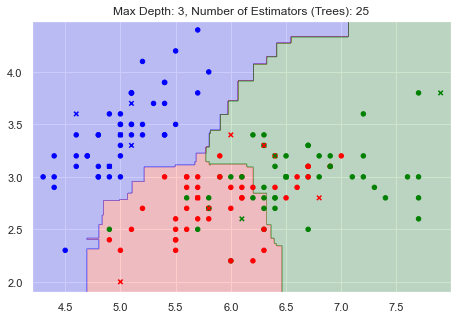

^^^ Train accuracy: 0.81, Test accuracy: 0.73 ^^^


In [18]:
plot_surface(
    X_train, X_test, y_train, y_test,
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators']
)